<a href="https://colab.research.google.com/github/Gaurav05082002/collab-notebooks/blob/main/yolo_img_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

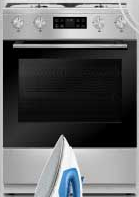

In [7]:
import os
import cv2
from PIL import Image
from ultralytics import YOLO
import ipywidgets as widgets
from IPython.display import display, clear_output
import io
import numpy as np

# Function to create output directory
def create_output_dir(output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Function to save and return image cutouts
def get_cutouts(image, boxes):
    cutouts = []
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cutout = image[y1:y2, x1:x2]
        cutouts.append(cutout)
    return cutouts

# Function to handle image upload and display cutouts
def on_image_upload(change):
    # Clear previous output
    clear_output()

    # Handle image upload
    image_data = change['new']
    file_info = next(iter(image_data.values()))
    image_bytes = file_info['content']
    image = Image.open(io.BytesIO(image_bytes))
    image_np = np.array(image)

    # Load the YOLOv8 model
    model = YOLO('yolov8n.pt')  # Use the appropriate model version

    # Convert image to RGB for YOLO
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model.predict(source=image_rgb)

    # Extract bounding boxes
    boxes = results[0].boxes.xyxy.cpu().numpy()  # or use .xywh for (x, y, w, h)

    # Get cutouts
    cutouts = get_cutouts(image_np, boxes)

    # Display cutouts with selection buttons
    display_cutouts_with_buttons(cutouts)

# Function to display cutouts with selection buttons
def display_cutouts_with_buttons(cutouts):
    for i, cutout in enumerate(cutouts):
        cutout_image = Image.fromarray(cutout)
        cutout_widget = widgets.Image(value=convert_image_to_bytes(cutout_image), format='png')
        button = widgets.Button(description=f'Select {i}')
        button.on_click(lambda b, cutout=cutout: on_select_cutout(cutout))
        display(widgets.VBox([cutout_widget, button]))

# Function to convert image to bytes
def convert_image_to_bytes(image):
    with io.BytesIO() as output:
        image.save(output, format="PNG")
        return output.getvalue()

# Function to handle cutout selection
def on_select_cutout(cutout):
    # Clear previous output
    clear_output()
    # Display the selected cutout
    cutout_image = Image.fromarray(cutout)
    display(cutout_image)
    # Here you can add additional processing for the selected cutout

# Create an image upload widget
upload_widget = widgets.FileUpload(
    accept='image/*',  # Accept only images
    multiple=False  # Single file upload
)

# Link the widget to the handler function
upload_widget.observe(on_image_upload, names='value')

# Display the upload widget
display(upload_widget)


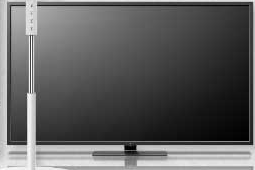

In [10]:
import os
import cv2
from PIL import Image
from ultralytics import YOLO
import ipywidgets as widgets
from IPython.display import display, clear_output
import io
import numpy as np

# Function to create output directory
def create_output_dir(output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Function to save and return image cutouts
def get_cutouts(image, boxes):
    cutouts = []
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cutout = image[y1:y2, x1:x2]
        cutouts.append(cutout)
    return cutouts

# Function to handle image upload and display cutouts
def on_image_upload(change):
    # Clear previous output
    clear_output()

    # Handle image upload
    image_data = change['new']
    file_info = next(iter(image_data.values()))
    image_bytes = file_info['content']
    image = Image.open(io.BytesIO(image_bytes))
    image_np = np.array(image)

    # Load the YOLOv8 model
    model = YOLO('yolov8n.pt')  # Use the appropriate model version

    # Convert image to RGB for YOLO
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model.predict(source=image_rgb)

    # Extract bounding boxes
    boxes = results[0].boxes.xyxy.cpu().numpy()  # or use .xywh for (x, y, w, h)

    # Get cutouts
    cutouts = get_cutouts(image_np, boxes)

    # Display cutouts with selection buttons
    display_cutouts_with_buttons(cutouts)

# Function to display cutouts with selection buttons
def display_cutouts_with_buttons(cutouts):
    cutout_widgets = []
    for i, cutout in enumerate(cutouts):
        cutout_image = Image.fromarray(cutout)
        cutout_image.thumbnail((100, 100))  # Resize cutouts for display
        cutout_widget = widgets.Image(value=convert_image_to_bytes(cutout_image), format='png')
        button = widgets.Button(description=f'Select {i}', layout=widgets.Layout(width='auto'))
        button.on_click(lambda b, cutout=cutout: on_select_cutout(cutout))
        cutout_widgets.append(widgets.VBox([cutout_widget, button]))
    display(widgets.HBox(cutout_widgets))

# Function to convert image to bytes
def convert_image_to_bytes(image):
    with io.BytesIO() as output:
        image.save(output, format="PNG")
        return output.getvalue()

# Function to handle cutout selection
def on_select_cutout(cutout):
    # Clear previous output
    clear_output()
    # Display the selected cutout
    cutout_image = Image.fromarray(cutout)
    display(cutout_image)
    # Here you can add additional processing for the selected cutout

# Create an image upload widget
upload_widget = widgets.FileUpload(
    accept='image/*',  # Accept only images
    multiple=False  # Single file upload
)

# Link the widget to the handler function
upload_widget.observe(on_image_upload, names='value')

# Display the upload widget
display(upload_widget)
